# Startup Success Prediction

## To Read dataset 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('indian_startups.csv')

In [3]:
#Dispay the first five rows of the dataframe or dataset
df.head()

,Company Name,Location,Sector,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,milestones,funding_rounds,Amount,Stage,Founders,has_VC,has_angel
0,LoadShare,Bangalore,Logistics & Supply Chain,2.2493,3.0027,4.6685,6.7041,3,3,3,"4,00,00,000",Series C,"Raghuram Talluri, Pramod Nair",0,1
1,Scaler,Bangalore,E-learning,5.1260,9.9973,7.0055,7.0055,9,1,4,"5,50,00,000",NaN,Abhimanyu Saxena,1,0
2,Chargebee,Chennai,Financial Services,1.0329,1.0329,1.4575,2.2055,5,4,1,"25,00,00,000",NaN,"Krish Subramanian, Thiyagarajan T, Rajaraman S...",0,0
3,Nautilus Mobile,Pune,Computer Games,3.1315,5.3151,6.0027,6.0027,5,1,3,"54,00,000",NaN,Rajan Navani,0,0
4,Waterfield Advisors,Mumbai,Financial Services,0.0000,1.6685,0.0384,0.0384,2,1,2,"60,00,000",Series B,Soumya Rajan,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company Name              297 non-null    object 
 1   Location                  297 non-null    object 
 2   Sector                    297 non-null    object 
 3   age_first_funding_year    297 non-null    float64
 4   age_last_funding_year     297 non-null    float64
 5   age_first_milestone_year  238 non-null    float64
 6   age_last_milestone_year   238 non-null    float64
 7   relationships             297 non-null    int64  
 8   milestones                297 non-null    int64  
 9   funding_rounds            297 non-null    int64  
 10  Amount                    295 non-null    object 
 11  Stage                     200 non-null    object 
 12  Founders                  296 non-null    object 
 13  has_VC                    297 non-null    int64  
 14  has_angel 

## Knowing the data

In [5]:
df.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,milestones,funding_rounds,has_VC,has_angel
count,297.000000,297.000000,238.000000,238.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2.360811,3.936074,2.900457,4.690095,7.222222,1.814815,2.249158,0.343434,0.259259
std,2.517209,2.892594,2.715314,3.046176,6.448689,1.369078,1.293908,0.475656,0.438968
min,-1.986300,-1.986300,-14.169900,-1.915100,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.712300,1.747900,1.002700,2.293850,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.684900,3.632900,2.628750,4.349300,5.000000,2.000000,2.000000,0.000000,0.000000
75%,3.632900,5.490400,4.211000,6.828775,10.000000,3.000000,3.000000,1.000000,1.000000
max,20.805500,20.805500,11.032900,13.556200,37.000000,6.000000,7.000000,1.000000,1.000000


In [6]:
#shape of our data
print('Shape of data',df.shape)

Shape of data (297, 15)


In [7]:
# Number of missing values

df.isnull().sum().sort_values(ascending=False)

Stage                       97
age_first_milestone_year    59
age_last_milestone_year     59
Amount                       2
Founders                     1
Company Name                 0
Location                     0
Sector                       0
age_first_funding_year       0
age_last_funding_year        0
relationships                0
milestones                   0
funding_rounds               0
has_VC                       0
has_angel                    0
dtype: int64

In [8]:
df.isnull().sum().sum()

218

# Exploratory Data Analysis

## To Handle missing value

### To handle missing values at Stage column

As we don't know the exact **Stage** of the startup we are using **fillna()** method to replace NaN with value = Unknown.

In [9]:
df['Stage'] = df['Stage'].fillna(value="Unknown")

In [10]:
df["Stage"].isnull().sum()

0

### To handle missing values at Amount 

As we don't know the exact amount of startup so we will use **dropna()** function to remove any rows with missing values in the **"Amount"** column.

In [11]:
df.dropna(subset=['Amount'], inplace=True)

In [12]:
df['Amount'].isnull().sum()

0

### To handle missing values at Founders

In [13]:
df['Founders']=df['Founders'].fillna(value="Anonymous")

In [14]:
df['Founders'].isnull().sum()

0

### Handling Missing Value in age_first_milestone_year and age_last_milestone_year

In [15]:
df[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,4
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [16]:
df[df['milestones'] == 0][['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
12,NaN,NaN,0
15,NaN,NaN,0
24,NaN,NaN,0
32,NaN,NaN,0
34,NaN,NaN,0


Based on above analysis, We can see that 'age_first_milestone_year' and 'age_last_milestone_year' have null values because they don't have any milestones.As you can see the row where milestoness is 0 it is accompained by null 'age_first_milestone_year' and 'age_last_milestone_year' column. So we decided to fill NaN by value 0.

In [17]:
df['age_first_milestone_year']=df['age_first_milestone_year'].fillna(value="0")

In [18]:
df['age_first_milestone_year'].isnull().sum()

0

In [19]:
df['age_last_milestone_year']=df['age_last_milestone_year'].fillna(value="0")

In [20]:
df['age_last_milestone_year'].isnull().sum()

0

In [21]:
# Checking if there are any missing values

df.isnull().sum().sort_values(ascending=False)

Company Name                0
Location                    0
Sector                      0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
milestones                  0
funding_rounds              0
Amount                      0
Stage                       0
Founders                    0
has_VC                      0
has_angel                   0
dtype: int64

### Replacing comas in **Amount**

In [22]:
df['Amount'] = df['Amount'].str.replace(',', '')

In [23]:
df['Amount'] = pd.to_numeric(df['Amount'],errors='coerce')

In [24]:
df['Amount'].dtype

dtype('float64')

Changing datatype of **age_first_milestone_year** and **age_last_milestone_year** to float

In [25]:
df['age_first_milestone_year'] = df.age_first_milestone_year.astype(float)
df['age_last_milestone_year'] = df.age_last_milestone_year.astype(float)

### Defining the success column as variable for prediction of startup

In [26]:
# define success as achieving a milestone within 2 years of first funding
df['success'] = (df['age_first_milestone_year'] <= df['age_first_funding_year'] + 2).astype(int)

In [27]:
df['success'].head(10)

0     0
1     1
2     1
3     0
4     1
5     1
6     1
8     0
9     1
10    0
Name: success, dtype: int32

In [28]:
df['success'].value_counts()

1    228
0     67
Name: success, dtype: int64

### Correlation heatmap

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df.corr()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,milestones,funding_rounds,Amount,has_VC,has_angel,success
age_first_funding_year,1.000000,0.789363,0.172322,0.013658,-0.220310,-0.342409,-0.164757,-0.036300,0.167220,-0.361450,0.142471
age_last_funding_year,0.789363,1.000000,0.309531,0.228881,0.010245,-0.153835,0.344602,0.005525,0.312946,-0.343341,-0.098127
age_first_milestone_year,0.172322,0.309531,1.000000,0.764952,0.328691,0.298119,0.187954,0.002860,-0.023958,-0.173319,-0.570621
age_last_milestone_year,0.013658,0.228881,0.764952,1.000000,0.433792,0.627703,0.276878,0.018783,-0.051239,-0.056068,-0.554405
relationships,-0.220310,0.010245,0.328691,0.433792,1.000000,0.480301,0.367349,0.039700,-0.057029,0.030803,-0.459947
milestones,-0.342409,-0.153835,0.298119,0.627703,0.480301,1.000000,0.265766,0.043916,-0.161322,0.233191,-0.339819
funding_rounds,-0.164757,0.344602,0.187954,0.276878,0.367349,0.265766,1.000000,0.070311,0.310885,0.057798,-0.320260
Amount,-0.036300,0.005525,0.002860,0.018783,0.039700,0.043916,0.070311,1.000000,0.002495,-0.024799,-0.003044
has_VC,0.167220,0.312946,-0.023958,-0.051239,-0.057029,-0.161322,0.310885,0.002495,1.000000,-0.172404,0.087882
has_angel,-0.361450,-0.343341,-0.173319,-0.056068,0.030803,0.233191,0.057798,-0.024799,-0.172404,1.000000,-0.027852


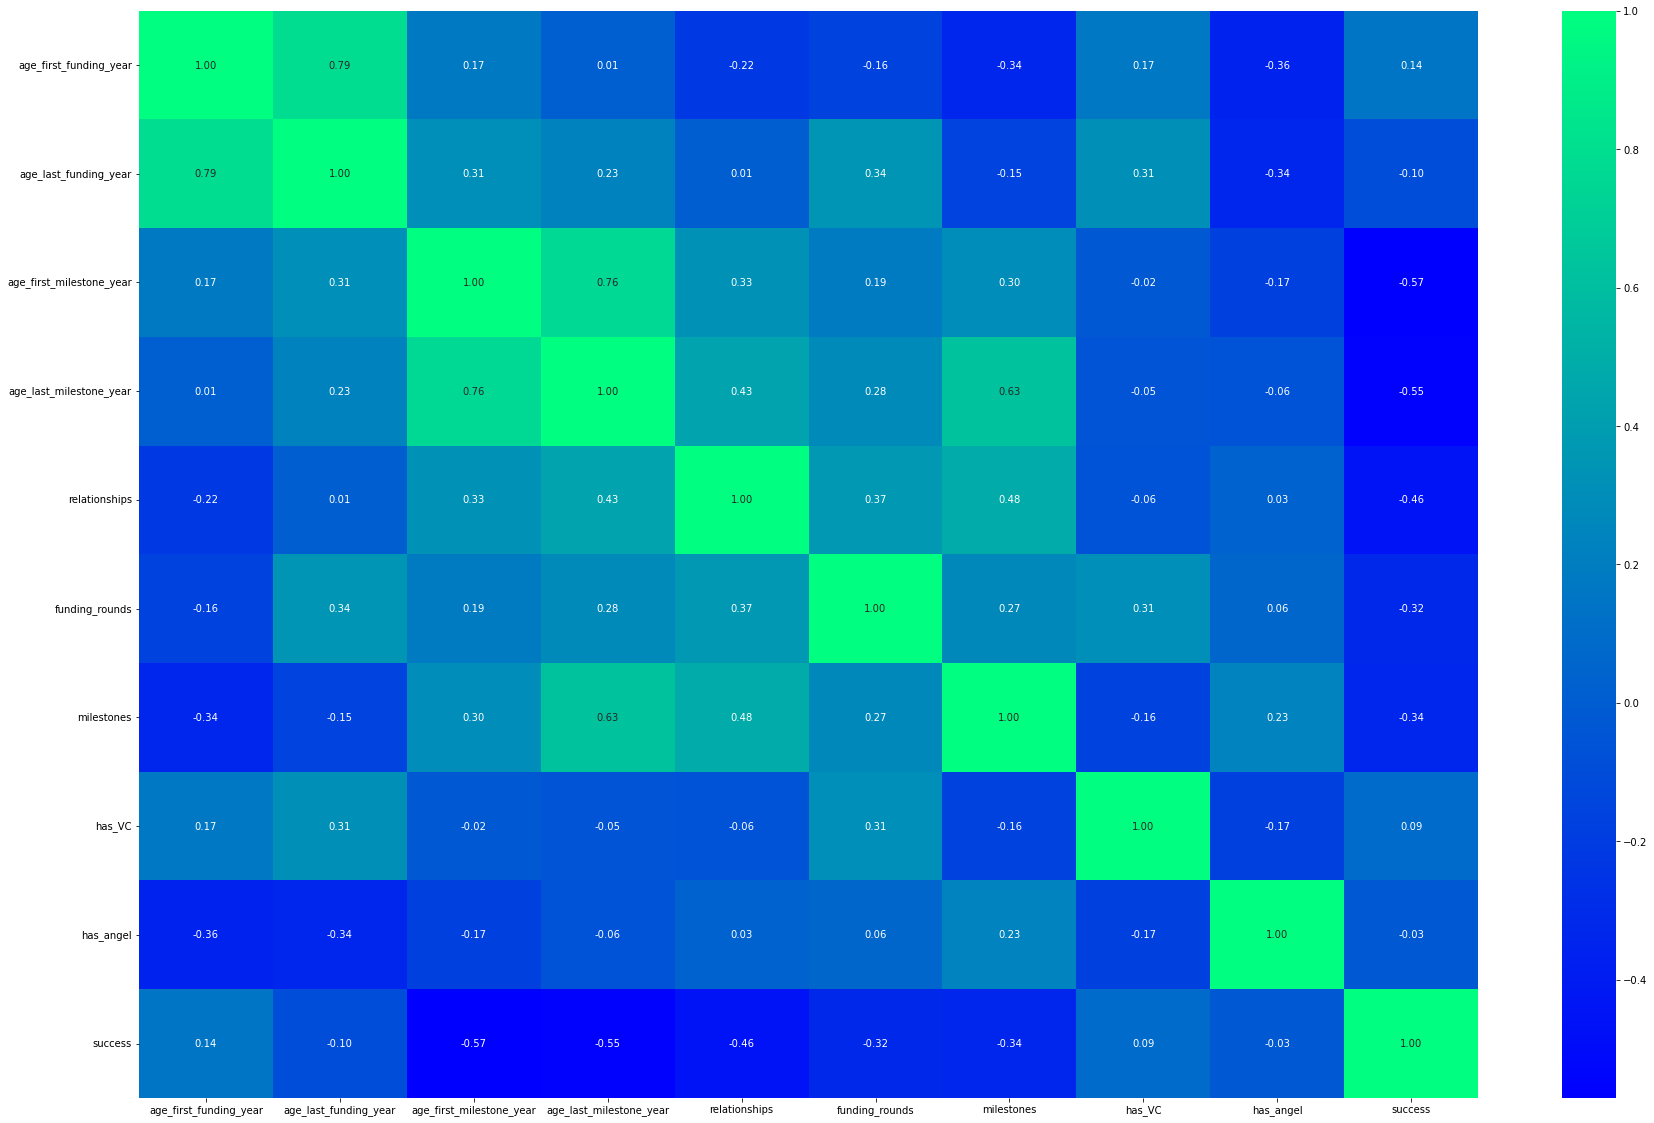

In [31]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','milestones','has_VC','has_angel','success']
corr_matrix = df[features].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='winter',fmt='.2f')
plt.show()

### Scatterplot

Based on the above correlation table and correlation heatmap we can see if two variables are positively correlated or negative correlated.then we can verify that by plotting a scatter plot between variables to visualize the relationship between them.

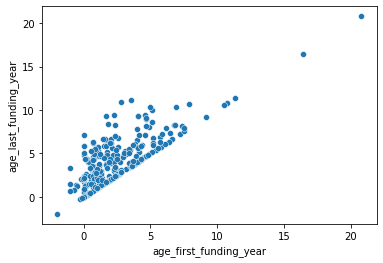

In [32]:
sns.scatterplot(data=df, x='age_first_funding_year', y='age_last_funding_year')
plt.show()

We see that **'age_first_funding_year'** and **'age_last_funding_year'** are really positively correlated whereas when one increases, the other also increases—mostly.

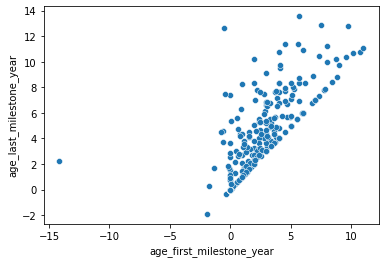

In [33]:
sns.scatterplot(data=df, x='age_first_milestone_year', y='age_last_milestone_year')
plt.show()

We see that **'age_first_milestone_year'** and **'age_last_milestone_year'** are really positively correlated.

## Box Plot

Now, we are doing boxplot to visualize the **distribution of numerical data** and **to identify any outliers present** in the dataset.

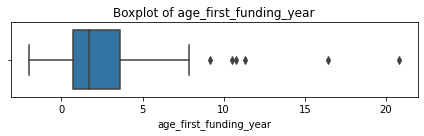

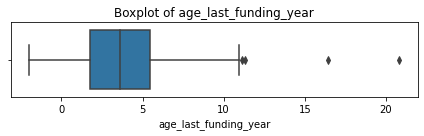

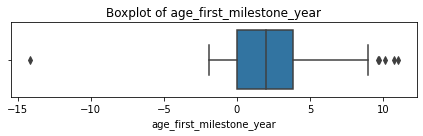

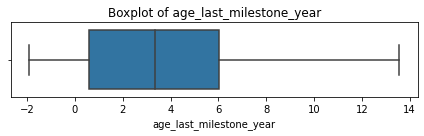

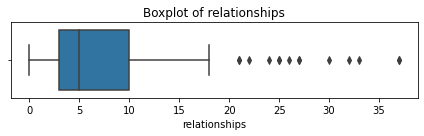

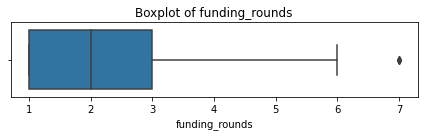

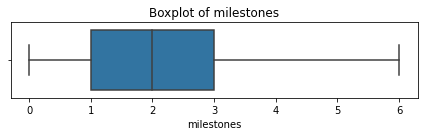

In [34]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','milestones']
for feature in featuresNum:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[feature],orient='h')
    plt.title("Boxplot of {}".format(feature))
    plt.tight_layout()

* The **whiskers** extending from the box represent the range of the data, excluding any outliers. 
* **Outliers** are represented as individual points outside the whiskers. 

## Visualization

### How many startups are successsful or unsuccessful ?

In [35]:
startup_counts = df['success'].value_counts()
print("Number of successful startups: ", startup_counts[1])
print("Number of unsuccessful startups: ", startup_counts[0])

Number of successful startups:  228
Number of unsuccessful startups:  67


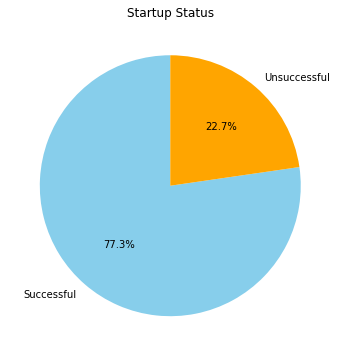

In [36]:
startup_counts.plot.pie(x=[startup_counts[1], startup_counts[0]],labels = ['Successful', 'Unsuccessful'],figsize=(6, 6), autopct='%1.1f%%', startangle=90,colors = ['skyblue', 'orange'])
plt.title('Startup Status')
plt.ylabel('')
plt.show()

# Pie Chart to show successful and unsuccessful startup w.r.t different sector

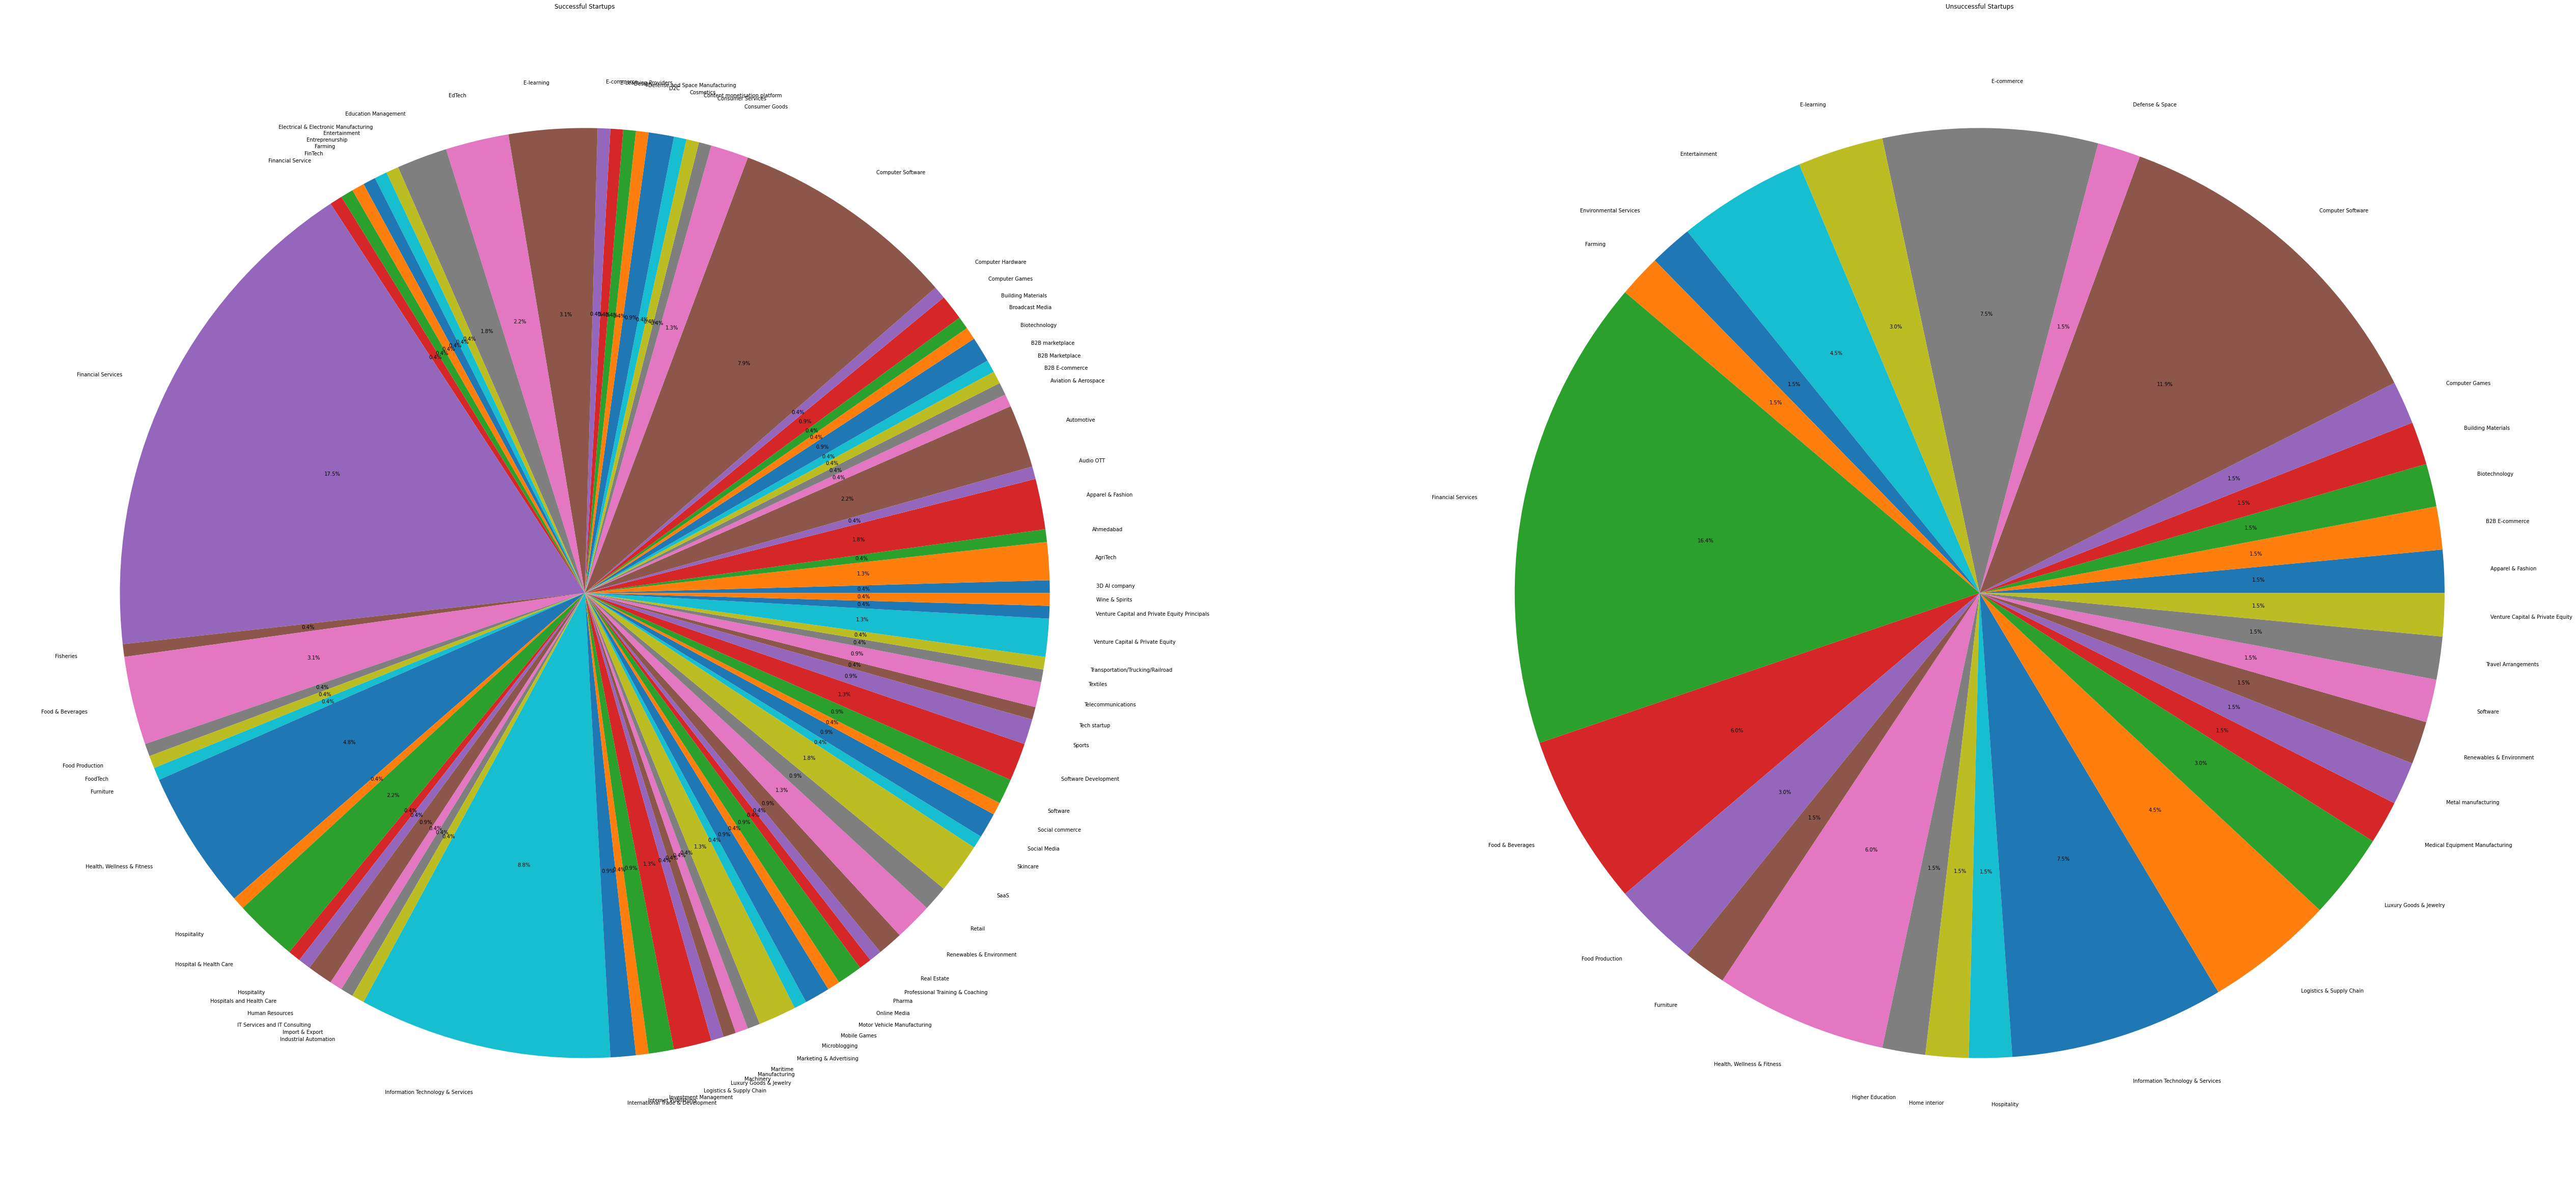

In [37]:
# Group the dataset by sector and success
grouped_df = df.groupby(['Sector', 'success']).size().reset_index(name='Count')

# Separate successful and unsuccessful counts
success_df = grouped_df[grouped_df['success'] == 1].reset_index(drop=True)
failure_df = grouped_df[grouped_df['success'] == 0].reset_index(drop=True)

fig, ax = plt.subplots(1, 2, figsize=(90,90))

# Plot successful startups
ax[0].pie(success_df['Count'], labels=success_df['Sector'], autopct='%1.1f%%')
ax[0].set_title('Successful Startups')

# Plot unsuccessful startups
ax[1].pie(failure_df['Count'], labels=failure_df['Sector'], autopct='%1.1f%%')
ax[1].set_title('Unsuccessful Startups')

plt.show()

### Which Sector has more number of startup ?

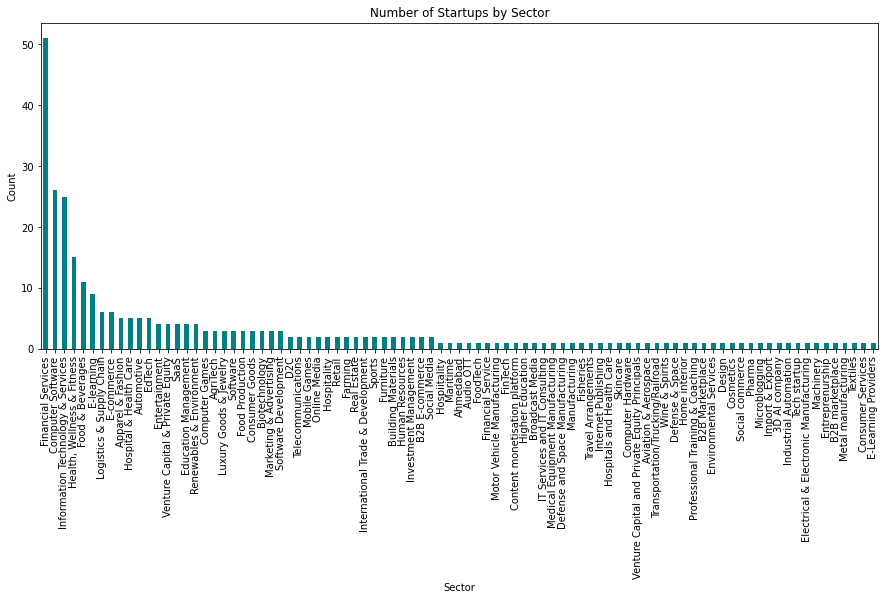

In [38]:
category_counts = df['Sector'].value_counts()
category_counts.plot.bar(figsize=(15, 6), color='teal')
plt.title('Number of Startups by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

### Which state has more number of startup?

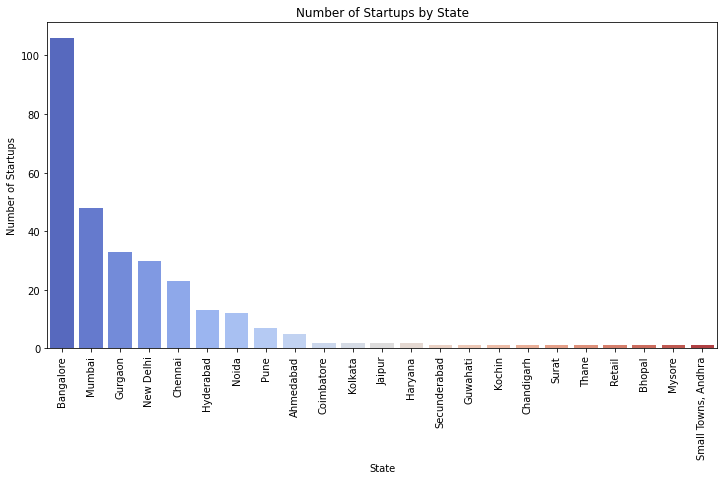

In [39]:
# Count number of startups in each state
state_counts = df['Location'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette=sns.color_palette("coolwarm", len(state_counts)))
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.title('Number of Startups by State')
plt.show()

In [40]:
state_counts = df['Location'].value_counts()
print(state_counts)

Bangalore              106
Mumbai                  48
Gurgaon                 33
New Delhi               30
Chennai                 23
Hyderabad               13
Noida                   12
Pune                     7
Ahmedabad                5
Coimbatore               2
Kolkata                  2
Jaipur                   2
Haryana                  2
Secunderabad             1
Guwahati                 1
Kochin                   1
Chandigarh               1
Surat                    1
Thane                    1
Retail                   1
Bhopal                   1
Mysore                   1
Small Towns, Andhra      1
Name: Location, dtype: int64


### How many startup has_VC?

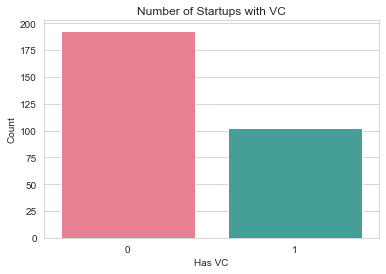

In [41]:
sns.set_style('whitegrid')

# Count number of startups with and without VC
has_vc = df['has_VC'].value_counts()
sns.countplot(x='has_VC', data=df, palette=sns.color_palette("husl", 2))
plt.title('Number of Startups with VC')
plt.xlabel('Has VC')
plt.ylabel('Count')
plt.show()

### Graph to indicate the startup's funding status and potential for growth.

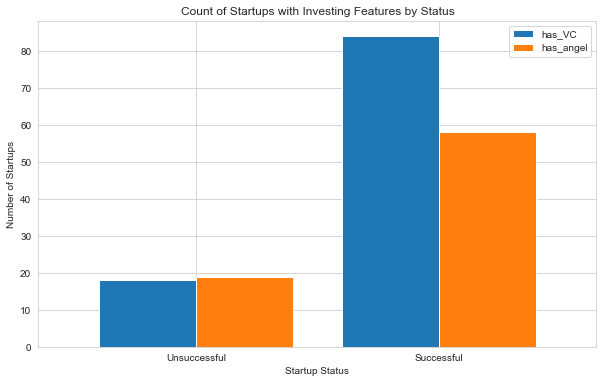

In [42]:
# Count the number of startups with each investing feature for both acquired and closed startups
features = ["has_VC", "has_angel"]
counts_by_status = df.groupby("success")[features].sum()

# Plot the bar graph
ax = counts_by_status.plot(kind="bar", figsize=(10, 6), width=0.8)
ax.set_xticklabels(["Unsuccessful", "Successful"], rotation=0)
ax.set_xlabel("Startup Status")
ax.set_ylabel("Number of Startups")
ax.set_title("Count of Startups with Investing Features by Status")
plt.show()

In [43]:
counts_by_status = df.groupby("success")[features].sum()
print(counts_by_status)

         has_VC  has_angel
success                   
0            18         19
1            84         58


## Drop Unused columns for modelling

In [44]:
df = df.drop(columns=['relationships','Location','Sector','Stage','Founders','Company Name','Amount'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    295 non-null    float64
 1   age_last_funding_year     295 non-null    float64
 2   age_first_milestone_year  295 non-null    float64
 3   age_last_milestone_year   295 non-null    float64
 4   milestones                295 non-null    int64  
 5   funding_rounds            295 non-null    int64  
 6   has_VC                    295 non-null    int64  
 7   has_angel                 295 non-null    int64  
 8   success                   295 non-null    int32  
dtypes: float64(4), int32(1), int64(4)
memory usage: 30.0 KB


# Machine Learning Algorithm

## Modelling

In [46]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('success', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                # made inplace as we have not used 'inplace = True'

y = df['success'] # Output/Dependent variable

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (236, 8)
Shape of the y Train : (236,)
Shape of the X test : (59, 8)
Shape of the y test : (59,)


In [49]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Random Forest

Accuracy: 0.9491525423728814
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.96      0.98      0.97        46

    accuracy                           0.95        59
   macro avg       0.94      0.91      0.92        59
weighted avg       0.95      0.95      0.95        59



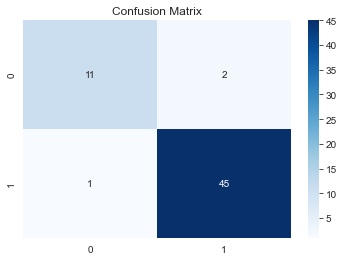

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Gradient Boosting 

Accuracy: 0.9322033898305084
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.94      0.98      0.96        46

    accuracy                           0.93        59
   macro avg       0.92      0.87      0.90        59
weighted avg       0.93      0.93      0.93        59



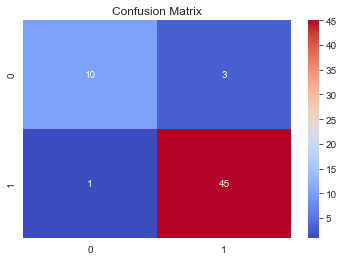

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier and fit it to the training data
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict the target variable for the test data and calculate accuracy score
y_pred = gb.predict(X_test)
gradient_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gradient_accuracy)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
gradient_cm=confusion_matrix(y_test, y_pred)
sns.heatmap(gradient_cm, annot=True, cmap='coolwarm', fmt='g')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbor(KNN)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



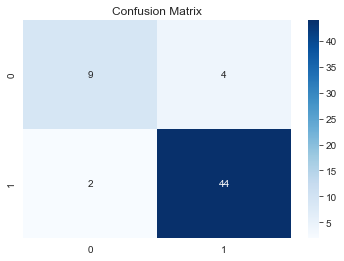

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object and fit to the training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

# Comparison of results of different algorithm

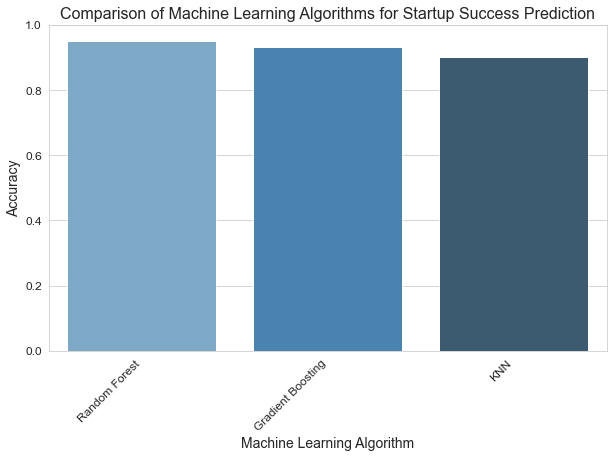

In [53]:
# Create a dictionary to store the results of different algorithms
results = {'Gradient Boosting': 0.9322,
           'Random Forest': 0.9491,
           'KNN': 0.90
          }

# Convert the dictionary into a pandas DataFrame for easy plotting
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

# Sort the DataFrame by accuracy values in descending order
df_results = df_results.sort_values(by='Accuracy', ascending=False)

# Plot the accuracy values as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=df_results.index, y='Accuracy', data=df_results, palette='Blues_d')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Machine Learning Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Machine Learning Algorithms for Startup Success Prediction', fontsize=16)
plt.ylim(0, 1)
plt.show()
